In [4]:
!pip install -q -U langchain transformers bitsandbytes accelerate


In [5]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) y
Token is valid (permission: write)

In [6]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, GenerationConfig, BitsAndBytesConfig
from transformers import BitsAndBytesConfig
import accelerate
# quantization_config = BitsAndBytesConfig(llm_int8_enable_fp32_cpu_offload=True)
bnb_config = BitsAndBytesConfig(
    llm_int8_enable_fp32_cpu_offload=True,
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16,
)
# control model memory allocation between devices for low GPU resource (0,cpu)
device_map = {
    "transformer.word_embeddings": 0,
    "transformer.word_embeddings_layernorm": 0,
    "lm_head": 0,
    "transformer.h": 0,
    "transformer.ln_f": 0,
    "model.embed_tokens": 0,
    "model.layers":0,
    "model.norm":0
}
device = "cuda" if torch.cuda.is_available() else "cpu"

# model use for inference
model_id="mychen76/mistral7b_ocr_to_json_v1"
model = AutoModelForCausalLM.from_pretrained(
    model_id,
    trust_remote_code=True,
    torch_dtype=torch.float16,
    quantization_config=bnb_config,
    device_map=device_map)
# tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_id, trust_remote_code=True)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [7]:
!python -m pip install paddlepaddle-gpu -i https://pypi.tuna.tsinghua.edu.cn/simple
!pip install "paddleocr>=2.0.1"
!pip install pillow numpy

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.9/758.9 MB ? eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 407.3/407.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 14.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117029 sha256=4854

In [8]:
from paddleocr import PaddleOCR

In [9]:
# Initialize PaddleOCR
paddleocr = PaddleOCR(lang="en", ocr_version="PP-OCRv4", use_gpu=True, show_log=False)

download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 4.00M/4.00M [00:08<00:00, 481kiB/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer/en_PP-OCRv4_rec_infer.tar


100%|██████████| 10.2M/10.2M [00:10<00:00, 972kiB/s] 


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:12<00:00, 175kiB/s]


In [10]:
def paddle_scan(paddleocr, img_path_or_nparray):
    result = paddleocr.ocr(img_path_or_nparray, cls=True)
    result = result[0]  # Assuming only one image is processed
    boxes = [line[0] for line in result]       # Bounding boxes
    txts = [line[1][0] for line in result]     # Raw text
    scores = [line[1][1] for line in result]   # Scores
    return txts, result

In [11]:
# Function to perform OCR and extract JSON
def process_invoice(image_path):
    try:
        # Perform OCR
        receipt_texts, receipt_boxes = paddle_scan(paddleocr, image_path)
        print(receipt_texts)
        print(receipt_boxes)
        # Prepare prompt for Hugging Face model
        prompt = f"""### Instruction:
        You are POS receipt data expert, parse, detect, recognize and convert following receipt OCR image result into structure receipt data object.
        Don't make up value not in the Input. Output must be a well-formed JSON object.```json


        ### Input:
        {receipt_boxes}

        ### Output:
        """

        # Generate JSON output using Hugging Face model
        with torch.inference_mode():
            inputs = tokenizer(prompt, return_tensors="pt", truncation=True).to(device)
            outputs = model.generate(**inputs, max_new_tokens=512)
            result_text = tokenizer.batch_decode(outputs)[0]
            print(result_text)

        return {
            # "ocr_text": receipt_texts,
            "json_output": result_text
        }

    except Exception as e:
        return {
            "error": str(e)
        }


In [12]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


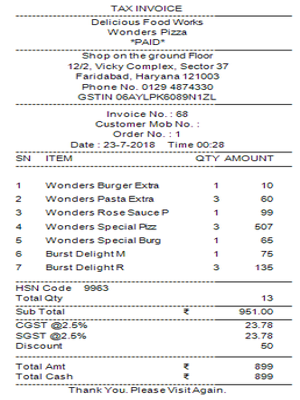

[2024/07/15 14:32:41] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


['TAX INVOICE', 'Delicious Food Works', 'Wonders Pizza', '*PAID*', 'Shop on the ground Floor', '12/2, Vicky Complex, Sector 37', 'Faridabad, Haryana 121003', 'Phone No. 0129 4874330', 'GSTIN 06AYLPK6089N1ZL', 'Invoice No.:68', 'Customer Mob No. :', 'Order No. : 1', 'Date : 23-7-2018', 'Time 00:28', 'SNITEM', 'QTY AMOUNT', '1', 'Wonders Burger Extra', '1', '10', '2', 'Wonders Pasta Extra', '3', '60', '3', 'Wonders Rose Sauce P', '1', '99', '4', 'Wonders Special Pzz', '3', '507', '5', 'Wonders Special Burg', '1', '65', '6', 'Burst Delight M', '1', '75', '7', 'Burst DelightR', '3', '135', 'HSN Code', '9963', 'Total Qty', '13', 'Sub Total', '951.00', 'CGST @2.5%', '23.78', 'SGST @2.5%', '23.78', 'Discount', '50', 'Total Amt', '899', 'Total Cash', 'E', '899', 'Thank You. Please VisitAgain.']
[[[[95.0, 5.0], [157.0, 5.0], [157.0, 16.0], [95.0, 16.0]], ('TAX INVOICE', 0.9768136739730835)], [[[77.0, 21.0], [176.0, 21.0], [176.0, 34.0], [77.0, 34.0]], ('Delicious Food Works', 0.996735692024231)

In [31]:
# Example usage
import urllib.request
import numpy as np
from PIL import Image

if __name__ == "__main__":
    image_path = '/content/drive/MyDrive/ocr_prac.jpeg'
    image_url='https://groups.google.com/group/jzebra-users/attach/d16dbba8a612edfa/Bill%20Image_Receipt.png?part=0.1'
    local_image_id='bill_image_receipt.png'
    urllib.request.urlretrieve(image_url,local_image_id)
    receipt_image = Image.open("/content/drive/MyDrive/img_2.png")
    receipt_image_array = np.array(receipt_image.convert('RGB'))
    display(receipt_image.resize((300,400)))  # Display the image
    result = process_invoice(receipt_image_array)
    prompt_str = str(result).replace("\n", "")
    output_index = prompt_str.find("### Output:")

    # Extract everything after "### Output:"
    if output_index != -1:
        output_content = prompt_str[output_index + len("### Output:"):]
        output_content=output_content.replace("\n", "")
        print(output_content)
    else:
        print("### Output: not found in the prompt.")
    # ocr=extract_text_before_output(result)
    print(type(result))

In [20]:
!pip install pyngrok

In [21]:
from flask import Flask,jsonify,request
from pyngrok import ngrok
from werkzeug.utils import secure_filename

In [22]:
port_no = 5000

In [35]:
import os
app = Flask(__name__)
ngrok.set_auth_token("2elGda95W53NMZfKTs5E5JqySJu_43ZrZJQN7xQbUf6aLM7Lj")
public_url =  ngrok.connect(port_no).public_url
import numpy as np
import cv2


from google.colab import drive
drive.mount('/content/drive')


# Define the upload folder and ensure it exists
UPLOAD_FOLDER = '/content/drive/MyDrive/uploads'
if not os.path.exists(UPLOAD_FOLDER):
    os.makedirs(UPLOAD_FOLDER)

app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER


@app.route("/")
def home():
    return f"Running Flask on Google Colab!"

print(f"To acces the Gloable link please click {public_url}")

@app.route("/upload", methods=["GET"])
def upload_file():
    image_path = '/content/drive/MyDrive/ocr_prac.jpeg'
    image_url='https://groups.google.com/group/jzebra-users/attach/d16dbba8a612edfa/Bill%20Image_Receipt.png?part=0.1'
    local_image_id='bill_image_receipt.png'
    urllib.request.urlretrieve(image_url,local_image_id)
    receipt_image = Image.open(local_image_id)
    receipt_image_array = np.array(receipt_image.convert('RGB'))
    result = process_invoice(receipt_image_array)
    print(result)
    return jsonify(result)

UPLOAD_FOLDER = '/content/uploads'
os.makedirs(UPLOAD_FOLDER, exist_ok=True)
app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER

@app.route('/upload_ocr', methods=['POST'])
def upload_and_ocr():
    if 'file' not in request.files:
        return jsonify({"error": "No file part in the request"}), 400
    file = request.files['file']
    if file.filename == '':
        return jsonify({"error": "No selected file"}), 400
    if file:
        filename = secure_filename(file.filename)
        file_path = os.path.join(app.config['UPLOAD_FOLDER'], filename)
        file.save(file_path)

        # Perform OCR on the uploaded file
        receipt_image = Image.open(file_path)
        receipt_image_array = np.array(receipt_image.convert('RGB'))
        ocr_result = process_invoice(receipt_image_array)

        #convert dict to string
        prompt_str = str(ocr_result)
        output_index = prompt_str.find("### Output:")

        # Extract everything after "### Output:"
        if output_index != -1:
            output_content = prompt_str[output_index + len("### Output:"):]

            #print(output_content)
        else:
            print("### Output: not found in the prompt.")
        return jsonify({"message": "File successfully uploaded", "filename": filename, "ocr_result": output_content}), 200

app.run(port=port_no)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
To acces the Gloable link please click https://8323-34-125-135-49.ngrok-free.app
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


[2024/07/15 14:48:20] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


['405 N Vineyard Ave A', 'Cutsine of India', 'Ontar1o.CA 91764', '909-937-1282', 'Guest Check', 'ww.bombaycuisine.com', 'www.bombaybanquet.com', 'TABLEA2-1 Guest', 'Your server was Bombay Restaurant', '5/4/20144:54:58PM-ID#0094611', 'ITEM', 'QTYPRICE', 'Lamb Bhuna', '1$14.99', 'Basmati Bo1led Rice 1\\2 Order', '1', '$2.99', 'Naan', '$2.99', 'Subtotal', '$20.97', 'Total Taxes', '$1.68', 'Grand Total', '$22.65', 'Amount Due:', '$22.65', '22.65', 'Thank You', 'Please Come Back Again']
[[[[111.0, 11.0], [219.0, 11.0], [219.0, 24.0], [111.0, 24.0]], ('405 N Vineyard Ave A', 0.9047333598136902)], [[[122.0, 3.0], [211.0, 2.0], [212.0, 13.0], [122.0, 14.0]], ('Cutsine of India', 0.8629553318023682)], [[[118.0, 21.0], [210.0, 21.0], [210.0, 34.0], [118.0, 34.0]], ('Ontar1o.CA 91764', 0.9007576107978821)], [[[135.0, 32.0], [199.0, 32.0], [199.0, 43.0], [135.0, 43.0]], ('909-937-1282', 0.9777025580406189)], [[[133.0, 42.0], [195.0, 42.0], [195.0, 55.0], [133.0, 55.0]], ('Guest Check', 0.963342607

INFO:werkzeug:127.0.0.1 - - [15/Jul/2024 14:49:28] "POST /upload_ocr HTTP/1.1" 200 -


<s> ### Instruction:
        You are POS receipt data expert, parse, detect, recognize and convert following receipt OCR image result into structure receipt data object.
        Don't make up value not in the Input. Output must be a well-formed JSON object.```json


        ### Input:
        [[[[111.0, 11.0], [219.0, 11.0], [219.0, 24.0], [111.0, 24.0]], ('405 N Vineyard Ave A', 0.9047333598136902)], [[[122.0, 3.0], [211.0, 2.0], [212.0, 13.0], [122.0, 14.0]], ('Cutsine of India', 0.8629553318023682)], [[[118.0, 21.0], [210.0, 21.0], [210.0, 34.0], [118.0, 34.0]], ('Ontar1o.CA 91764', 0.9007576107978821)], [[[135.0, 32.0], [199.0, 32.0], [199.0, 43.0], [135.0, 43.0]], ('909-937-1282', 0.9777025580406189)], [[[133.0, 42.0], [195.0, 42.0], [195.0, 55.0], [133.0, 55.0]], ('Guest Check', 0.9633426070213318)], [[[107.0, 53.0], [222.0, 53.0], [222.0, 66.0], [107.0, 66.0]], ('ww.bombaycuisine.com', 0.9453547596931458)], [[[107.0, 65.0], [222.0, 65.0], [222.0, 78.0], [107.0, 78.0]], ('www.bom

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


['Pizza Ht india', 'Sapphire Hosptality and Rocreat', 'A nit o', 'N.PVT LTDTriCopexKr indcor', 'Stadius.Ghod dhod roadSurat', 'CINU55101201210236494', '31095 Laichend', 'Tb120/', 'Chk1529', 'Gst 2', 'Customer/1529', 'May31170919PN', 'Dine In', '1 68 Chi1i Dheese', 'R.K', '76239924280ustorer', '129.00', '139.00', '1.CraofMushrun', '1Ned Cheese Max', '671.00', 'VegieSuprene', 'Dont Cook We', '50%', 'Dont Cook Ne', '335.50-', 'Sub Total', '603.50', 'Srv Charge', '60.35', 'SrTKCs5.%', '36.12', 'SBCess0.2%In', '1.25', 'Total Due', '664.00', 'SrTxKCess5.8 inc KKCess 0.2%', 'MTIN 24190104773vef09/07/2014', 'CST 24590104773wef09/07/2014', 'Service Tax No.AAEC045540S0002']
[[[[114.0, 40.0], [183.0, 44.0], [182.0, 59.0], [113.0, 54.0]], ('Pizza Ht india', 0.8401680588722229)], [[[80.0, 61.0], [220.0, 65.0], [220.0, 78.0], [80.0, 74.0]], ('Sapphire Hosptality and Rocreat', 0.8754094839096069)], [[[125.0, 54.0], [171.0, 54.0], [171.0, 65.0], [125.0, 65.0]], ('A nit o', 0.7657282948493958)], [[[80.

INFO:werkzeug:127.0.0.1 - - [15/Jul/2024 14:51:12] "POST /upload_ocr HTTP/1.1" 200 -


<s> ### Instruction:
        You are POS receipt data expert, parse, detect, recognize and convert following receipt OCR image result into structure receipt data object.
        Don't make up value not in the Input. Output must be a well-formed JSON object.```json


        ### Input:
        [[[[114.0, 40.0], [183.0, 44.0], [182.0, 59.0], [113.0, 54.0]], ('Pizza Ht india', 0.8401680588722229)], [[[80.0, 61.0], [220.0, 65.0], [220.0, 78.0], [80.0, 74.0]], ('Sapphire Hosptality and Rocreat', 0.8754094839096069)], [[[125.0, 54.0], [171.0, 54.0], [171.0, 65.0], [125.0, 65.0]], ('A nit o', 0.7657282948493958)], [[[80.0, 71.0], [216.0, 74.0], [216.0, 89.0], [80.0, 85.0]], ('N.PVT LTDTriCopexKr indcor', 0.8006746768951416)], [[[88.0, 82.0], [213.0, 84.0], [213.0, 99.0], [88.0, 96.0]], ('Stadius.Ghod dhod roadSurat', 0.849765419960022)], [[[94.0, 94.0], [210.0, 94.0], [210.0, 107.0], [94.0, 107.0]], ('CINU55101201210236494', 0.870040774345398)], [[[67.0, 112.0], [135.0, 116.0], [134.0, 130.0]